In [120]:
import networkx as nx
from inet import *

def inet_draw(inet):
    inet = nx.MultiDiGraph(inet)
    inet.remove_nodes_from(list(nx.isolates(inet)))
    nx.draw_networkx(inet,
                    labels={
                        n: ("" if inet.nodes[n]["bipartite"] == 0
                            else inet.nodes[n]["tag"]) for n in inet.nodes},
                    node_size=[
                        100 if is_active_wire(inet, n) else
                        0 if inet.nodes[n]["bipartite"] == 0
                        else 500 for n in inet.nodes],
                    node_color=[
                        "red" if is_active_wire(inet, n) else
                        "blue" if inet.nodes[n]["bipartite"] == 0
                        else "green" for n in inet.nodes],
                    connectionstyle=["arc3,rad=-0.00", "arc3,rad=0.3"],
                    )


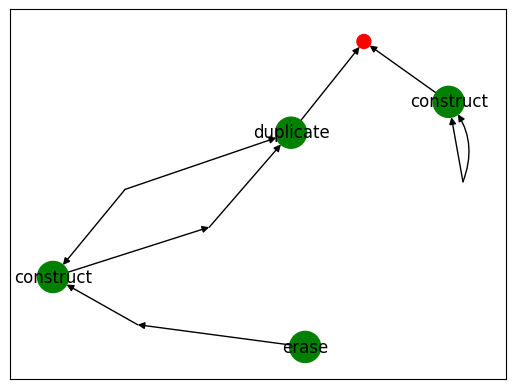

In [121]:
inet = nx.MultiDiGraph()
u = inet_add_construct(inet)
v = inet_add_duplicate(inet)
w = inet_add_construct(inet)
e = inet_add_erase(inet)
inet_connect_ports(inet, (u, 0), (v, 0))
inet_connect_ports(inet, (u, 1), (u, 2))
inet_connect_ports(inet, (v, 1), (w, 1))
inet_connect_ports(inet, (v, 2), (w, 0))
inet_connect_ports(inet, (e, 0), (w, 2))
inet_draw(inet)

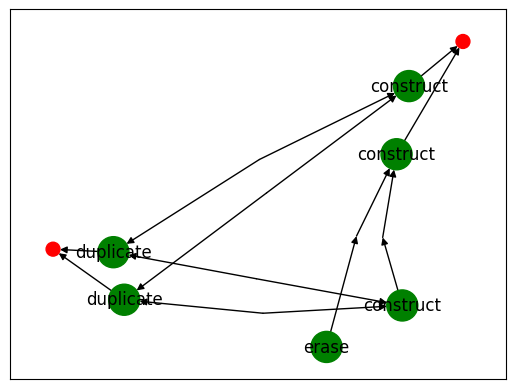

In [122]:
commute_construct_duplicate(inet)
inet_draw(inet)

[(8, 17, 0), (12, 18, 0), (16, 8, 1), (18, 8, 2), (19, 16, 0), (23, 17, 0), (39, 23, 1), (39, 19, 1), (40, 23, 2), (40, 19, 2)]


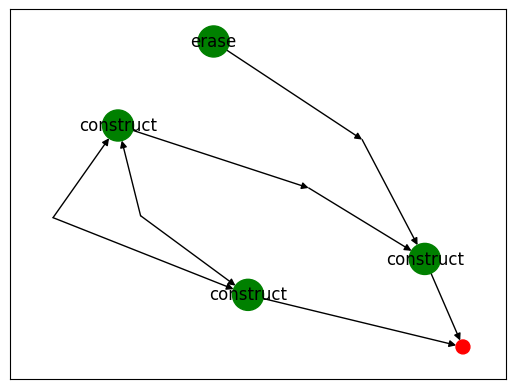

In [123]:
annihilate_concon_or_dupdup(inet)
print(inet.edges(keys=True))
inet_draw(inet)

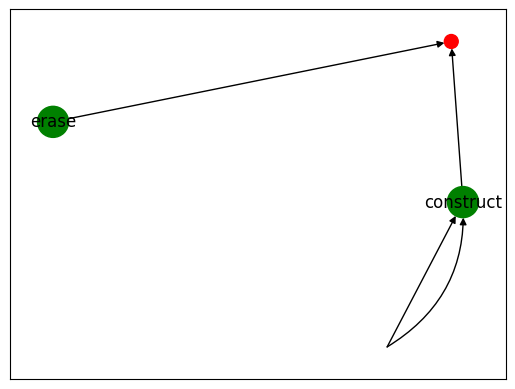

In [124]:
annihilate_concon_or_dupdup(inet)
annihilate_concon_or_dupdup(inet)
inet_draw(inet)

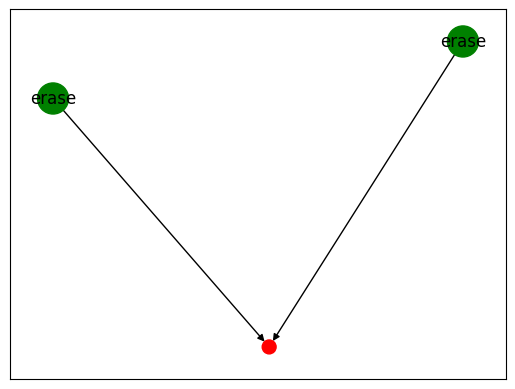

In [125]:
commute_condup_erase(inet)
inet_draw(inet)

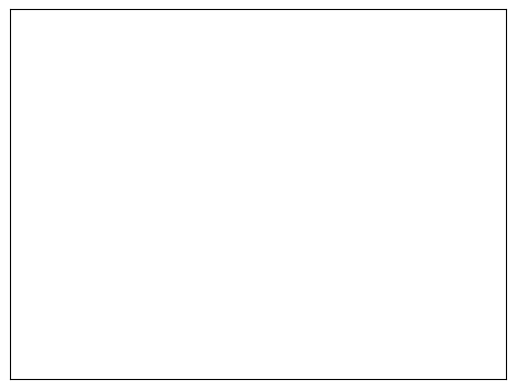

In [126]:
annihilate_erase_erase(inet)
inet_draw(inet)